In [1]:
import os.path, sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from PIL import Image
from numpy import expand_dims
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow import keras
import numpy as np
from sklearn import metrics
import pandas as pd
import seaborn as sn

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
def train_CNN(train_directory, validation_data, target_size, classes,
              batch_size, num_epochs, num_classes,verbose):
        
    input_shape = tuple(list(target_size)+[3])
    
    # Model architecture
    model = tf.keras.models.Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),

    # 32 neuron in the fully-connected layer  
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),

    # 3 output neurons for 3 classes with the softmax activation
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    # Optimizer and compilation
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])
    
    # Total sample count
    total_sample=train_generator.n
    
    # Training
    model.fit(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=num_epochs,
        verbose=verbose)
    
    return model

In [4]:
training_data = '/content/drive/MyDrive/Colab Notebooks/Data_split/train'
validation_data = '/content/drive/MyDrive/Colab Notebooks/Data_split/val'
testing_data = '/content/drive/MyDrive/Colab Notebooks/Data_split/test'

grey_train = '/content/drive/MyDrive/Colab Notebooks/Grey_split/train'
grey_val = '/content/drive/MyDrive/Colab Notebooks/Grey_split/val'
grey_test = '/content/drive/MyDrive/Colab Notebooks/Grey_split/test'

ny_train = '/content/drive/MyDrive/Colab Notebooks/NY_split/train'
ny_val = '/content/drive/MyDrive/Colab Notebooks/NY_split/val'
ny_test = '/content/drive/MyDrive/Colab Notebooks/NY_split/test'

# ImageDataGenerator object instance with scaling
train_datagen = ImageDataGenerator(rescale = 1./255)
# Flow training images in batches using the generator
train_generator = train_datagen.flow_from_directory(
            training_data, # This is the source directory for training images
            target_size=(600,400),       
            classes = ['Easy','Medium','Hard'], # Specify the classes explicitly
            # Since we use categorical_crossentropy loss, we need categorical labels
            class_mode='categorical')

val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = val_datagen.flow_from_directory(
            validation_data,
            target_size=(600,400),       
            classes = ['Easy','Medium','Hard'],
            class_mode='categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
            testing_data,
            target_size=(600,400),        
            classes = ['Easy','Medium','Hard'],
            class_mode='categorical')

######################################################################################################
print('\n')
grey_train_datagen = ImageDataGenerator(rescale = 1./255)
grey_train_generator = train_datagen.flow_from_directory(
            grey_train,
            target_size=(600,400),       
            classes = ['Easy','Medium','Hard'],
            class_mode='categorical')

grey_val_datagen = ImageDataGenerator(rescale = 1./255)
grey_val_generator = val_datagen.flow_from_directory(
            grey_val,
            target_size=(600,400),       
            classes = ['Easy','Medium','Hard'],
            class_mode='categorical')

grey_test_datagen = ImageDataGenerator(rescale = 1./255)
grey_test_generator = test_datagen.flow_from_directory(
            grey_test,
            target_size=(600,400),        
            classes = ['Easy','Medium','Hard'],
            class_mode='categorical')

###########################################################################################################
print('\n')
ny_train_datagen = ImageDataGenerator(rescale = 1./255)
ny_train_generator = train_datagen.flow_from_directory(
            ny_train,
            target_size=(600,400),       
            classes = ['Easy','Medium','Hard'],
            class_mode='categorical')

ny_val_datagen = ImageDataGenerator(rescale = 1./255)
ny_val_generator = val_datagen.flow_from_directory(
            ny_val,
            target_size=(600,400),       
            classes = ['Easy','Medium','Hard'],
            class_mode='categorical')

ny_test_datagen = ImageDataGenerator(rescale = 1./255)
ny_test_generator = test_datagen.flow_from_directory(
            ny_test,
            target_size=(600,400),        
            classes = ['Easy','Medium','Hard'],
            class_mode='categorical')

Found 2100 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


Found 2100 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


Found 2100 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
with tf.device('/device:GPU:0'): # Load pre-trained model weights, don't include final layer
  model__ = tf.keras.applications.NASNetLarge(input_shape = (600, 400, 3), include_top = False, weights = "imagenet", classes = 3)

for layer in model__.layers:
  layer.trainable = False

last_layer = model__.get_layer('activation_259') # Fetch last layer
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output) # Add pooling layer to the end
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation = 'softmax')(x) # Follow convolutional and pooling layer with dense network and output layer

prefab_model = tf.keras.Model(model__.input, x) # Combine pre-trained model and new layers
prefab_model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.categorical_crossentropy, metrics = ['acc']) # Compile model

with tf.device('/device:GPU:0'): # Fit to MoonBoard dataset
  model_classifier = prefab_model.fit(ny_train_generator, epochs = 30, validation_data = ny_val_generator, batch_size = 32, verbose = 1)

  prefab_model.evaluate(train_generator)
  prefab_model.evaluate(val_generator)
  prefab_model.evaluate(test_generator) # Evaluate model performance

In [6]:
with tf.device('/device:GPU:0'):
    cnn=train_CNN(train_directory = train_generator,
                  validation_data = val_generator,
                  target_size = (600, 400),
                  classes = ['Easy','Medium','Hard'],
                  batch_size = 32,
                  num_epochs = 20, num_classes = 3, verbose = 0)
    
    print("\nOG CNN Scores:") # Original Dataset
    cnn.evaluate(train_generator)
    cnn.evaluate(val_generator)
    cnn.evaluate(test_generator)

with tf.device('/device:GPU:0'):
    cnn=train_CNN(train_directory = grey_train_generator,
                  validation_data = grey_val_generator,
                  target_size = (600, 400),
                  classes = ['Easy','Medium','Hard'],
                  batch_size = 32,
                  num_epochs = 20, num_classes = 3, verbose = 0)
    
    print("\nGreyscale CNN Scores:") # Greyscale Dataset
    cnn.evaluate(train_generator)
    cnn.evaluate(val_generator)
    cnn.evaluate(test_generator)

with tf.device('/device:GPU:0'):
    cnn=train_CNN(train_directory = ny_train_generator,
                  validation_data = ny_val_generator,
                  target_size = (600, 400),
                  classes = ['Easy','Medium','Hard'],
                  batch_size = 32,
                  num_epochs = 20, num_classes = 3, verbose = 0)
    
    print("\nNY CNN Scores:") # No Background Dataset
    cnn.evaluate(train_generator)
    cnn.evaluate(val_generator)
    cnn.evaluate(test_generator)


NY CNN Scores:
10/10 [==============================] - 133s 15s/step - loss: 1.8661 - acc: 0.6367


In [7]:
def plot_confusion_matrix(Y_true, Y_predict, title = None):
    labels = ['Easy', 'Medium', 'Hard']
    conf_matrix = metrics.confusion_matrix(Y_true, Y_predict)
    df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                          index = [i for i in labels],
                          columns = [i for i in labels])
    
    plt.figure(dpi = 150, figsize = (5,4))
    sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
    plt.xlabel('predicted grade')
    plt.ylabel('actual grade')
    
    if title:
        plt.title(title)
    plt.show()
    return

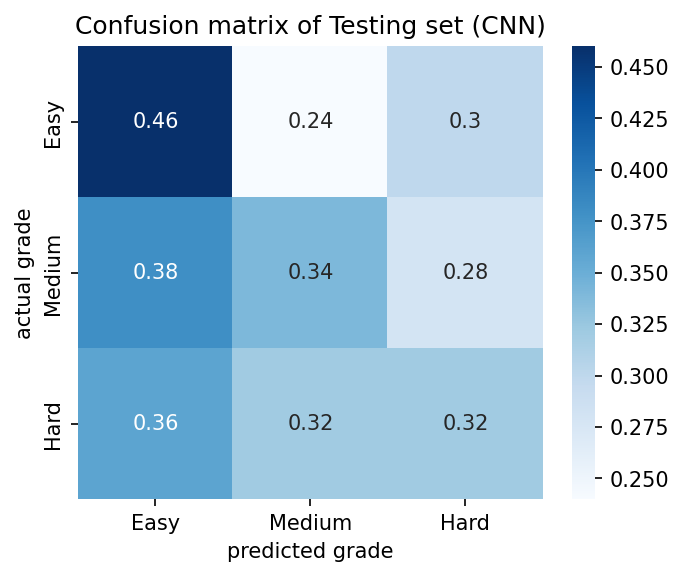

In [8]:
plot_confusion_matrix(ny_test_generator.labels, cnn.predict(ny_test_generator).argmax(axis=1), title = 'Confusion matrix of Testing set (CNN)')

In [9]:
# \/ Insert Route Image Path Here \/
user_path = '/content/drive/MyDrive/Colab Notebooks/NY_split/test/Easy/IMG_5035.PNG'

# Fetch image from path
image = tf.keras.preprocessing.image.load_img(user_path, target_size=(600, 400))

# Convert to array, then a numpy array
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.

# Use model to predict class and print result
predicted_class = np.argmax(cnn.predict(input_arr), axis=-1)
print("Class Meaning: 0 for Easy, 1 for Medium, 2 for Hard")
print("Class of Route:", predicted_class)

Class Meaning: 0 for Easy, 1 for Medium, 2 for Hard
Class of Route: [0]
